In [80]:

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



In [81]:
movie_data = Path("Resources/mo_movies_data.parquet")
movie_data_df = pd.read_parquet(movie_data)
movie_data_df.head()

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0
1,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0
2,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0
3,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0
4,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000.0,5989640.0


In [82]:
movie_data_df.dtypes

Title           object
Year            object
IMDB Rating    float64
IMDB Votes     float64
Genre           object
Box Office      object
IMDB ID         object
Budget         float64
Revenue        float64
dtype: object

In [83]:
movie_data_df['IMDB Rating'].max()


9.0

In [84]:
max_movie = movie_data_df.loc[movie_data_df['IMDB Rating'] == 9.0]
max_movie

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
561,The Dark Knight,2008,9.0,2896249.0,"Action, Crime, Drama","$534,987,076",tt0468569,185000000.0,1.004558e+09


In [85]:
movie_data_df['IMDB Rating'].min()


1.2

In [86]:
min_movie = movie_data_df.loc[movie_data_df['IMDB Rating'] == 1.2]
min_movie

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
2298,"Kidnapping, Caucasian Style",2014,1.2,604.0,Comedy,N/A,tt4537362,3500000.0,179000.0


In [87]:
movie_data_count = len(movie_data_df['Title'].unique())
movie_data_count


2316

In [88]:
average_rating = movie_data_df['IMDB Rating'].mean()
average_rating

6.402530017152659

In [89]:
year_agg = movie_data_df.groupby(['Year']).agg({'IMDB Rating': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

IMDB Rating                                     
            mean median       var       std       sem
Year                                                 
2005    6.354450    6.5  1.025020  1.012432  0.073257
2006    6.386321    6.5  1.058817  1.028988  0.070671
2007    6.506771    6.6  1.033933  1.016825  0.073383
2008    6.301932    6.4  1.204948  1.097701  0.076296
2009    6.417972    6.5  0.891296  0.944085  0.064089
2010    6.373913    6.4  0.888749  0.942735  0.062162
2011    6.338655    6.4  0.989470  0.994721  0.064478
2012    6.398551    6.4  1.010920  1.005445  0.069883
2013    6.509211    6.5  0.863131  0.929048  0.061528
2014    6.372381    6.4  1.102391  1.049948  0.072453
2015    6.476000    6.6  0.859421  0.927050  0.065552

In [90]:
ratings_percentiles = movie_data_df['IMDB Rating'].quantile([.1,.9])
lowerq = ratings_percentiles[.1]
upperq = ratings_percentiles[.9]

print(lowerq)
print(upperq)

5.2
7.6


(array([  4.,   5.,  19.,  47., 154., 369., 765., 651., 292.,  26.]),
 array([1.2 , 1.98, 2.76, 3.54, 4.32, 5.1 , 5.88, 6.66, 7.44, 8.22, 9.  ]),
 <BarContainer object of 10 artists>)

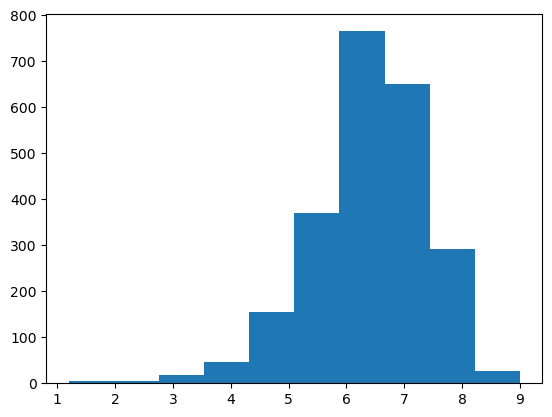

In [91]:
plt.hist(movie_data_df['IMDB Rating'])

In [92]:
size_bins = [0, 3, 4, 5, 6, 7, 8, 9]
labels = ["0-3", "3-5", "5", "6", "7", "8", "9-10"]

movie_data_df["Rating Scale"] = pd.cut(movie_data_df['IMDB Rating'], size_bins, labels=labels)
movie_data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,Rating Scale
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0,7
1,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0,7
2,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0,7
3,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454.0,115860.0,7
4,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000.0,5989640.0,5
...,...,...,...,...,...,...,...,...,...,...
2327,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531.0,2411594.0,6
2328,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000.0,19000000.0,8
2329,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000.0,1328612.0,7
2330,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000.0,1268793.0,6


In [93]:
year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Budget': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

C:\Users\sgbri\AppData\Local\Temp\ipykernel_3464\3838499138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Budget': ['mean', 'median', 'var', 'std', 'sem']})


Budget                                          \
                      mean      median           var           std   
Rating Scale                                                         
0-3           1.755000e+07  17500000.0  2.394067e+14  1.547277e+07   
3-5           2.389848e+07  13400000.0  9.630221e+14  3.103260e+07   
5             2.686363e+07  18000000.0  7.577680e+14  2.752759e+07   
6             3.623786e+07  25000000.0  1.473432e+15  3.838531e+07   
7             3.849897e+07  20000000.0  2.291996e+15  4.787479e+07   
8             3.933820e+07  17500000.0  2.964023e+15  5.444284e+07   
9-10          4.927090e+07  15000000.0  4.384577e+15  6.621614e+07   

                            
                       sem  
Rating Scale                
0-3           3.868193e+06  
3-5           5.402082e+06  
5             2.278199e+06  
6             1.662652e+06  
7             1.516210e+06  
8             2.342847e+06  
9-10          8.089589e+06

In [94]:
year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Revenue': ['mean', 'median', 'var', 'std', 'sem']})
year_agg

C:\Users\sgbri\AppData\Local\Temp\ipykernel_3464\3524987023.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_agg = movie_data_df.groupby(['Rating Scale']).agg({'Revenue': ['mean', 'median', 'var', 'std', 'sem']})


Revenue                                          \
                      mean      median           var           std   
Rating Scale                                                         
0-3           2.413450e+07   8356750.0  1.203462e+15  3.469095e+07   
3-5           3.986261e+07  15179302.0  4.074497e+15  6.383179e+07   
5             6.275072e+07  28038801.5  1.247672e+16  1.116992e+08   
6             7.678367e+07  36351350.0  1.376280e+16  1.173150e+08   
7             9.950727e+07  34564651.0  2.815250e+16  1.677871e+08   
8             1.500037e+08  47196625.5  7.655507e+16  2.766859e+08   
9-10          2.228181e+08  77208711.0  1.004522e+17  3.169419e+08   

                            
                       sem  
Rating Scale                
0-3           8.672737e+06  
3-5           1.111169e+07  
5             9.244295e+06  
6             5.081476e+06  
7             5.313870e+06  
8             1.190666e+07  
9-10          3.872062e+07

In [95]:
def line_reg(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.007012608799433597


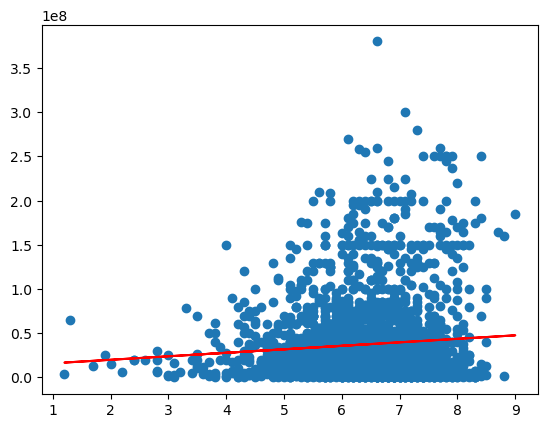

In [101]:
x_values = movie_data_df['IMDB Rating']
y_values = movie_data_df['Budget']
plt.xlabel = 'Budget'
plt.ylabel = 'Total Revenue'
line_reg(x_values, y_values)


The r-squared is: 0.03383002973982099


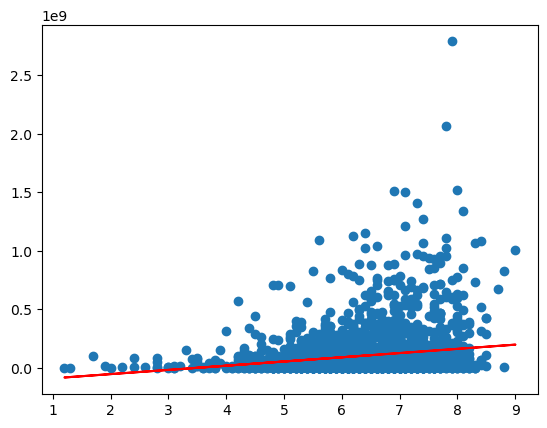

In [102]:
x_values = movie_data_df['IMDB Rating']
y_values = movie_data_df['Revenue']
plt.xlabel = 'Rating'
plt.ylabel = 'Total Revenue'
line_reg(x_values, y_values)